#  San Alfonso Portal Inmobiliario Web Scraping
Por Marcelo Rovai<br>
17 Deciembre 2018


https://www.portalinmobiliario.com/

In [1]:
from time import sleep
import pandas as pd
from bs4 import BeautifulSoup
import requests
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set()

In [2]:
def sumario_estat(df):
    n = df.count()
    mu = int(df.mean())
    md = int(df.median())
    mn = int(df.min())
    mx = int(df.max())
    rg = int(np.ptp(df))
     
    print ("\n * Resumen de los datos *\n")
    print("Propriedades:  ", n)
    print("Precio Medio:  ${0:,}".format(mu))
    print("Precio Cntr :  ${0:,}".format(md))
    print("Precio min. :  ${0:,}".format(mn))
    print("Precio max. :  ${0:,}".format(mx))
    print("Rango precios: ${0:,}".format(rg))
    
    sns.boxplot(data=df, orient="v", palette="magma", )  

## Arriendos: parametros

In [3]:
negocio = 'arriendo'  # venta o arriendo
tipo = 'departamento'  # departamento, casa, oficina, sitio, parcela, etc.
comuna = 'algarrobo'
region = 'valparaiso'
estado = 'usado'  # nuevo; usado; indiferente
dorm_min = '3'  # 0 ==> 6
dorm_max = '3'  # 0 ==> 6
bano_min = '2'  # 0 ==> 6
bano_max = '2'  # 0 ==> 6
moneda = 'pesos'  # pesos; UFs
precio_min = '100.000'
precio_max = '2.000.000'
sup_min = '90,00'
sup_max = '110,00'
num_max_paginas = 1

In [7]:
# executar la query para un numero de paginas
if estado == 'nuevo': 
    condicion ="1"
elif estado == 'usado':
     condicion ="2"
else: 
    condicion ="3"
    
if moneda == 'pesos': 
    uni_mon ="1"
else: 
    uni_mon ="2" 

# print("En caso response ==> [200], todo OK!")
# print (r)
print("")

print("_____________________________________________")
print(negocio, tipo, comuna )
print("")
print ("Estado      : {}".format(estado))
print ("Habitaciones: de {} hasta {}".format(dorm_min, dorm_max))
print ("Baños       : de {} hasta {}".format(bano_min, bano_max))
print("Superficie m2: de {} hasta {}".format(sup_min, sup_max))
print("Precios en {}: de {} hasta {}".format(moneda, precio_min, precio_max))
print("_____________________________________________\n")

depts = []
for i in range(num_max_paginas):
    URL = "https://www.portalinmobiliario.com/" + negocio + "/" + tipo + "/" + comuna + "-" + region + "?tp=2&op=1&ca=" + condicion + "&ts=1&dd=" + dorm_min + "&dh=" + dorm_max + "&bd=" + bano_min + "&bh=" + bano_max + "&or=&mn=" + uni_mon + "&sf=1&sp=1&pd=" + precio_min + "&ph=" + precio_max + "&sd=" + sup_min + "&sh=" + sup_max+"&pg="+str(i+1)
    #print(URL)
    r = requests.get(URL)
    sleep(0.5)
    #print(i, r)
    res = BeautifulSoup(r.text, 'html5lib')   
    deptos = res.find_all('div', {'class':'product-item-data'})
    for d in deptos:
        dept = []
        d1 = d.find('h4').text
        dept.append(d1)
        for p in d.find_all('p'):
            d2 = p.text
            dept.append(d2)
        depts.append(dept)
dep_df = pd.DataFrame(depts)  
del dep_df[1]
dep_df.columns = ['propriedad', 'codigo', 'tipo', 'valor', 'superficie']
dep_df['valor'] = dep_df.valor.str.split(expand=True)[2]
dep_df['valor'] = dep_df.valor.str.split(',', expand=True)[0]
dep_df.valor.replace(regex=True,inplace=True,to_replace=r'\D',value=r'')
dep_df['valor'] = pd.to_numeric(dep_df['valor'])
dep_df['codigo'] = dep_df.codigo.str.split(expand=True)[1]
dep_df['superficie'] = dep_df.superficie.str.split(expand=True)[1]
dep_df


_____________________________________________
arriendo departamento algarrobo

Estado      : usado
Habitaciones: de 3 hasta 3
Baños       : de 2 hasta 2
Superficie m2: de 90,00 hasta 110,00
Precios en pesos: de 100.000 hasta 2.000.000
_____________________________________________



,propriedad,codigo,tipo,valor,superficie
0,"San Alfonso del Mar, Algarrobo ...",2198214,3D/2B,110001,110
1,"Sal Alfonso del Mar, Algarrobo, Región de Valp...",4437694,3D/2B,120223,100
2,"Resort San Alfonso del Mar s/n, Algarrobo",2965569,3D/2B,113113,110
3,"San Alfonso del Mar ,Salida libre los domingos...",3632082,3D/2B,125000,100
4,"SAN ALFONSO DEL MAR / ALGARROBO, Algarrobo",3789555,3D/2B,131646,107
5,"Mirasol 540 - Departamento 901, Algarrobo",3474273,3D/2B,132886,90
6,"San Alfonso del Mar, Algarrobo",3766968,3D/2B,141592,90
7,"San Alfonso del Mar, Algarrobo,, Algarrobo",4484200,3D/2B,149999,90
8,"condominio arenamaris 1, Algarrobo",4437832,3D/2B,150258,98
9,"PARQUE NORTE 350, Algarrobo",3949191,3D/2B,664435,90


In [8]:
san_alfonso = dep_df.drop([5,8,9])


 * Resumen de los datos *

Propriedades:   7
Precio Medio:  $127,367
Precio Cntr :  $125,000
Precio min. :  $110,001
Precio max. :  $149,999
Rango precios: $39,998


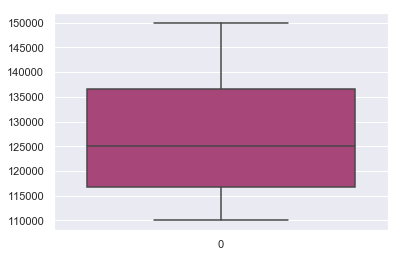

In [9]:
sumario_estat(san_alfonso.valor)

## Venta: parametros

In [11]:
negocio = 'venta'  # venta o arriendo
tipo = 'departamento'  # departamento, casa, oficina, sitio, parcela, etc.
comuna = 'algarrobo'
region = 'valparaiso'
estado = 'usado'  # nuevo; usado; indiferente
dorm_min = '3'  # 0 ==> 6
dorm_max = '3'  # 0 ==> 6
bano_min = '2'  # 0 ==> 6
bano_max = '2'  # 0 ==> 6
moneda = 'UFs'  # pesos; UFs
precio_min = '4.000'
precio_max = '8.000'
sup_min = '90,00'
sup_max = '110,00'
num_max_paginas = 5

In [15]:
# executar la query para un numero de paginas
if estado == 'nuevo': 
    condicion ="1"
elif estado == 'usado':
     condicion ="2"
else: 
    condicion ="3"
    
if moneda == 'pesos': 
    uni_mon ="1"
else: 
    uni_mon ="2" 

# print("En caso response ==> [200], todo OK!")
# print (r)
print("")

print("_____________________________________________")
print(negocio, tipo, comuna )
print("")
print ("Estado      :\t{}".format(estado))
print ("Habitaciones:\tde {} hasta {}".format(dorm_min, dorm_max))
print ("Baños       :\tde {} hasta {}".format(bano_min, bano_max))
print("Superficie m2:\tde {} hasta {}".format(sup_min, sup_max))
print("Precios en {}:\tde {} hasta {}".format(moneda, precio_min, precio_max))
print("_____________________________________________\n")

depts = []
for i in range(num_max_paginas):
    URL = "https://www.portalinmobiliario.com/" + negocio + "/" + tipo + "/" + comuna + "-" + region + "?tp=2&op=1&ca=" + condicion + "&ts=1&dd=" + dorm_min + "&dh=" + dorm_max + "&bd=" + bano_min + "&bh=" + bano_max + "&or=&mn=" + uni_mon + "&sf=1&sp=1&pd=" + precio_min + "&ph=" + precio_max + "&sd=" + sup_min + "&sh=" + sup_max+"&pg="+str(i+1)
    #print(URL)
    r = requests.get(URL)
    sleep(0.5)
    print(i, end="")
    res = BeautifulSoup(r.text, 'html5lib')   
    deptos = res.find_all('div', {'class':'product-item-data'})
    for d in deptos:
        dept = []
        d1 = d.find('h4').text
        dept.append(d1)
        for p in d.find_all('p'):
            d2 = p.text
            dept.append(d2)
        depts.append(dept)
dep_df = pd.DataFrame(depts)  
del dep_df[1]
dep_df.columns = ['propriedad', 'codigo', 'tipo', 'valor', 'superficie']
dep_df['valor'] = dep_df.valor.str.split(expand=True)[2]
dep_df['valor'] = dep_df.valor.str.split(',', expand=True)[0]
dep_df.valor.replace(regex=True,inplace=True,to_replace=r'\D',value=r'')
dep_df['valor'] = pd.to_numeric(dep_df['valor'])
dep_df['codigo'] = dep_df.codigo.str.split(expand=True)[1]
dep_df['superficie'] = dep_df.superficie.str.split(expand=True)[1]
dep_df


_____________________________________________
venta departamento algarrobo

Estado      :	usado
Habitaciones:	de 3 hasta 3
Baños       :	de 2 hasta 2
Superficie m2:	de 90,00 hasta 110,00
Precios en UFs:	de 4.000 hasta 8.000
_____________________________________________

01234

,propriedad,codigo,tipo,valor,superficie
0,San Alfonso del Mar - Camino Algarrobo Mirasol...,4355828,3D/2B,5600,100
1,"Acceso a Laguna Bahía 665, Algarrobo",4385271,3D/2B,4000,98
2,VENTA |DEPARTAMENTO | ALGARROBO | LAGUNA BAHÍA...,4434286,3D/2B,4000,98
3,"Espectacular vista despejada al mar., Algarrobo",4320658,3D/2B,4250,90
4,"BAJADA AGUAS MARINA/ VISTA AL MAR, Algarrobo",4448705,3D/2B,4316,90
5,"Condominio Magno Club, REBAJADISIMO / ENTREGA ...",4482813,3D/2B,4462,90
6,"DEPTO. 3D/2B LAGUNA BAHIA CON HERMOSAS VISTAS,...",4349825,3D/2B,4600,90
7,"Ültimo departamento excelentes terminaciones, ...",4324209,3D/2B,5100,99
8,"Algarrobo, condominio Miramar, central., Algar...",4307866,3D/2B,5300,110
9,"San Alfonso del Mar, Algarrobo",3588719,3D/2B,5350,100


In [16]:
san_alfonso = dep_df.drop([4,5,6,8,15,25,35,48,49])


 * Resumen de los datos *

Propriedades:   41
Precio Medio:  $5,781
Precio Cntr :  $5,800
Precio min. :  $4,000
Precio max. :  $6,800
Rango precios: $2,800


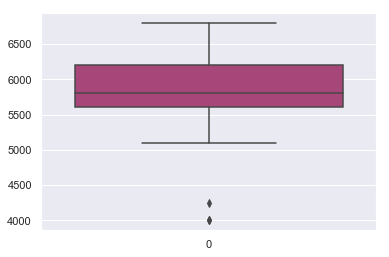

In [17]:
sumario_estat(san_alfonso.valor)